<a href="https://colab.research.google.com/github/xbadiam/Marketing_Campaign/blob/main/notebooks/MarketingCampaign_data_exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Campaña de marketing
Aumentar las ganancias de una campaña de marketing

## 1. Introducción

Un modelo de respuesta puede aumentar significativamente la eficiencia de una campaña de marketing, ya sea incrementando las respuestas o reduciendo los gastos. El objetivo es predecir quién responderá a una oferta de un producto o servicio.

### 1.2. Variables del dataset

* **Education**: Nivel de estudios del cliente.
* **Marital**: Estado civil del cliente.
* **Kidhome**: Número de niños pequeños en el hogar del cliente.
* **Teenhome**: Número de adolescentes en el hogar del cliente.
* **Income**: Ingreso familiar anual del cliente.
* **DtCustomer**: Fecha de inscripción del cliente en la empresa.
* **Recency**: Número de días transcurridos desde la última compra.
* **MntFishProducts**: Cantidad gastada en productos de pescado en los 2 últimos años.
* **MntMeatProducts**: Cantidad gastada en productos de pescado en los dos últimos años.
* **MntFruits**: Cantidad gastada en productos de fruta en los dos últimos años.
* **MntSweetProducts**: Cantidad gastada en productos dulces en los dos últimos años.
* **Mntwines**: Cantidad gastada en productos de vino en los últimos 2 años.
* **MntGoldProds**: Gasto en productos de oro en los últimos 2 años.
* **NumDealsPurchases**: Número de compras realizadas con descuento.
* **NumCatalogPurchases**: Número de compras realizadas a través del catálogo.
* **NumStorePurchases**: Número de compras realizadas directamente en tiendas.
* **NumWebPurchases**: Número de compras realizadas a través del sitio web de la empresa.
* **NumWebVisitsMonth** Número de visitas al sitio web de la empresa durante el último mes.
* **AcceptedCmp1**: 1 si el cliente aceptó la oferta en la primera campaña, 0 en caso contrario.
* **AcceptedCmp2**: 1 si el cliente aceptó la oferta en la segunda campaña, 0 en caso contrario.
* **AcceptedCmp3**: - 1 si el cliente aceptó la oferta en la tercera campaña, 0 en caso contrario.
* **AcceptedCmp4**: 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en caso contrario.
* **AcceptedCmp5**: 1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario.
* **Complain**: 1 si la cliente se quejó en los últimos 2 años.
* **Z_CostContact**: Costo de contactar a un cliente.
* **Z_Revenue**: Ingresos tras la campaña de aceptación del cliente.
* **Response (target)**: Respuesta del cliente. 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario.





In [10]:
!rm -rf /content/Marketing_Campaign

! git clone https://github.com/xbadiam/Marketing_Campaign.git

Cloning into 'Marketing_Campaign'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 63.56 KiB | 4.54 MiB/s, done.


In [6]:
# Data processing
# ==============================================================================
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Modelado
# ==============================================================================
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# graphic
# ==============================================================================
import plotly.express as px

In [13]:
data = pd.read_csv('/content/Marketing_Campaign/inputs/marketing_campaign.csv', sep=";")
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


## 3. Análisis exploratorio


### 3.1. Tipo de cada columna

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Detectamos las siguientes observaciones en la estructura del dataset:

* La variable **Dt_Costumer** presenta un tipo de dato Object y la cambiaremos al tipo DateTime

* La variable 'Income' detectamos datos faltantes

* Las variables categoricas 'Education' y 'Marital_status' deberan ser convertidas a variables de tipo numéricas.

### 3.2. Número de observaciones y valores ausentes

In [16]:
print('Tamaño del dataset: ', data.shape)

Tamaño del dataset:  (2240, 29)


In [17]:
# Número de datos ausentes por variable
# ==============================================================================
data.isna().sum().sort_values()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntFishProducts,0
MntWines,0


TAl como se ha comentado en el apartado anterior, la variable **Income* contiene valores ausente (un total de 24). En el apartado imputación de valores ausentes seguiremos una estrategiaa de imputación cuando el set de datos está incompleto.

### 3.3. Variable respuesta (predictoria)

En el conjunto de datos no existe una variable que actue como tal y consideramos que estamos realizando el estudio de modelos no supervisados.


### 3.4. Variables numéricas

In [18]:
# Variables numéricas
# ==============================================================================
data.select_dtypes(include=['float64', 'int']).describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


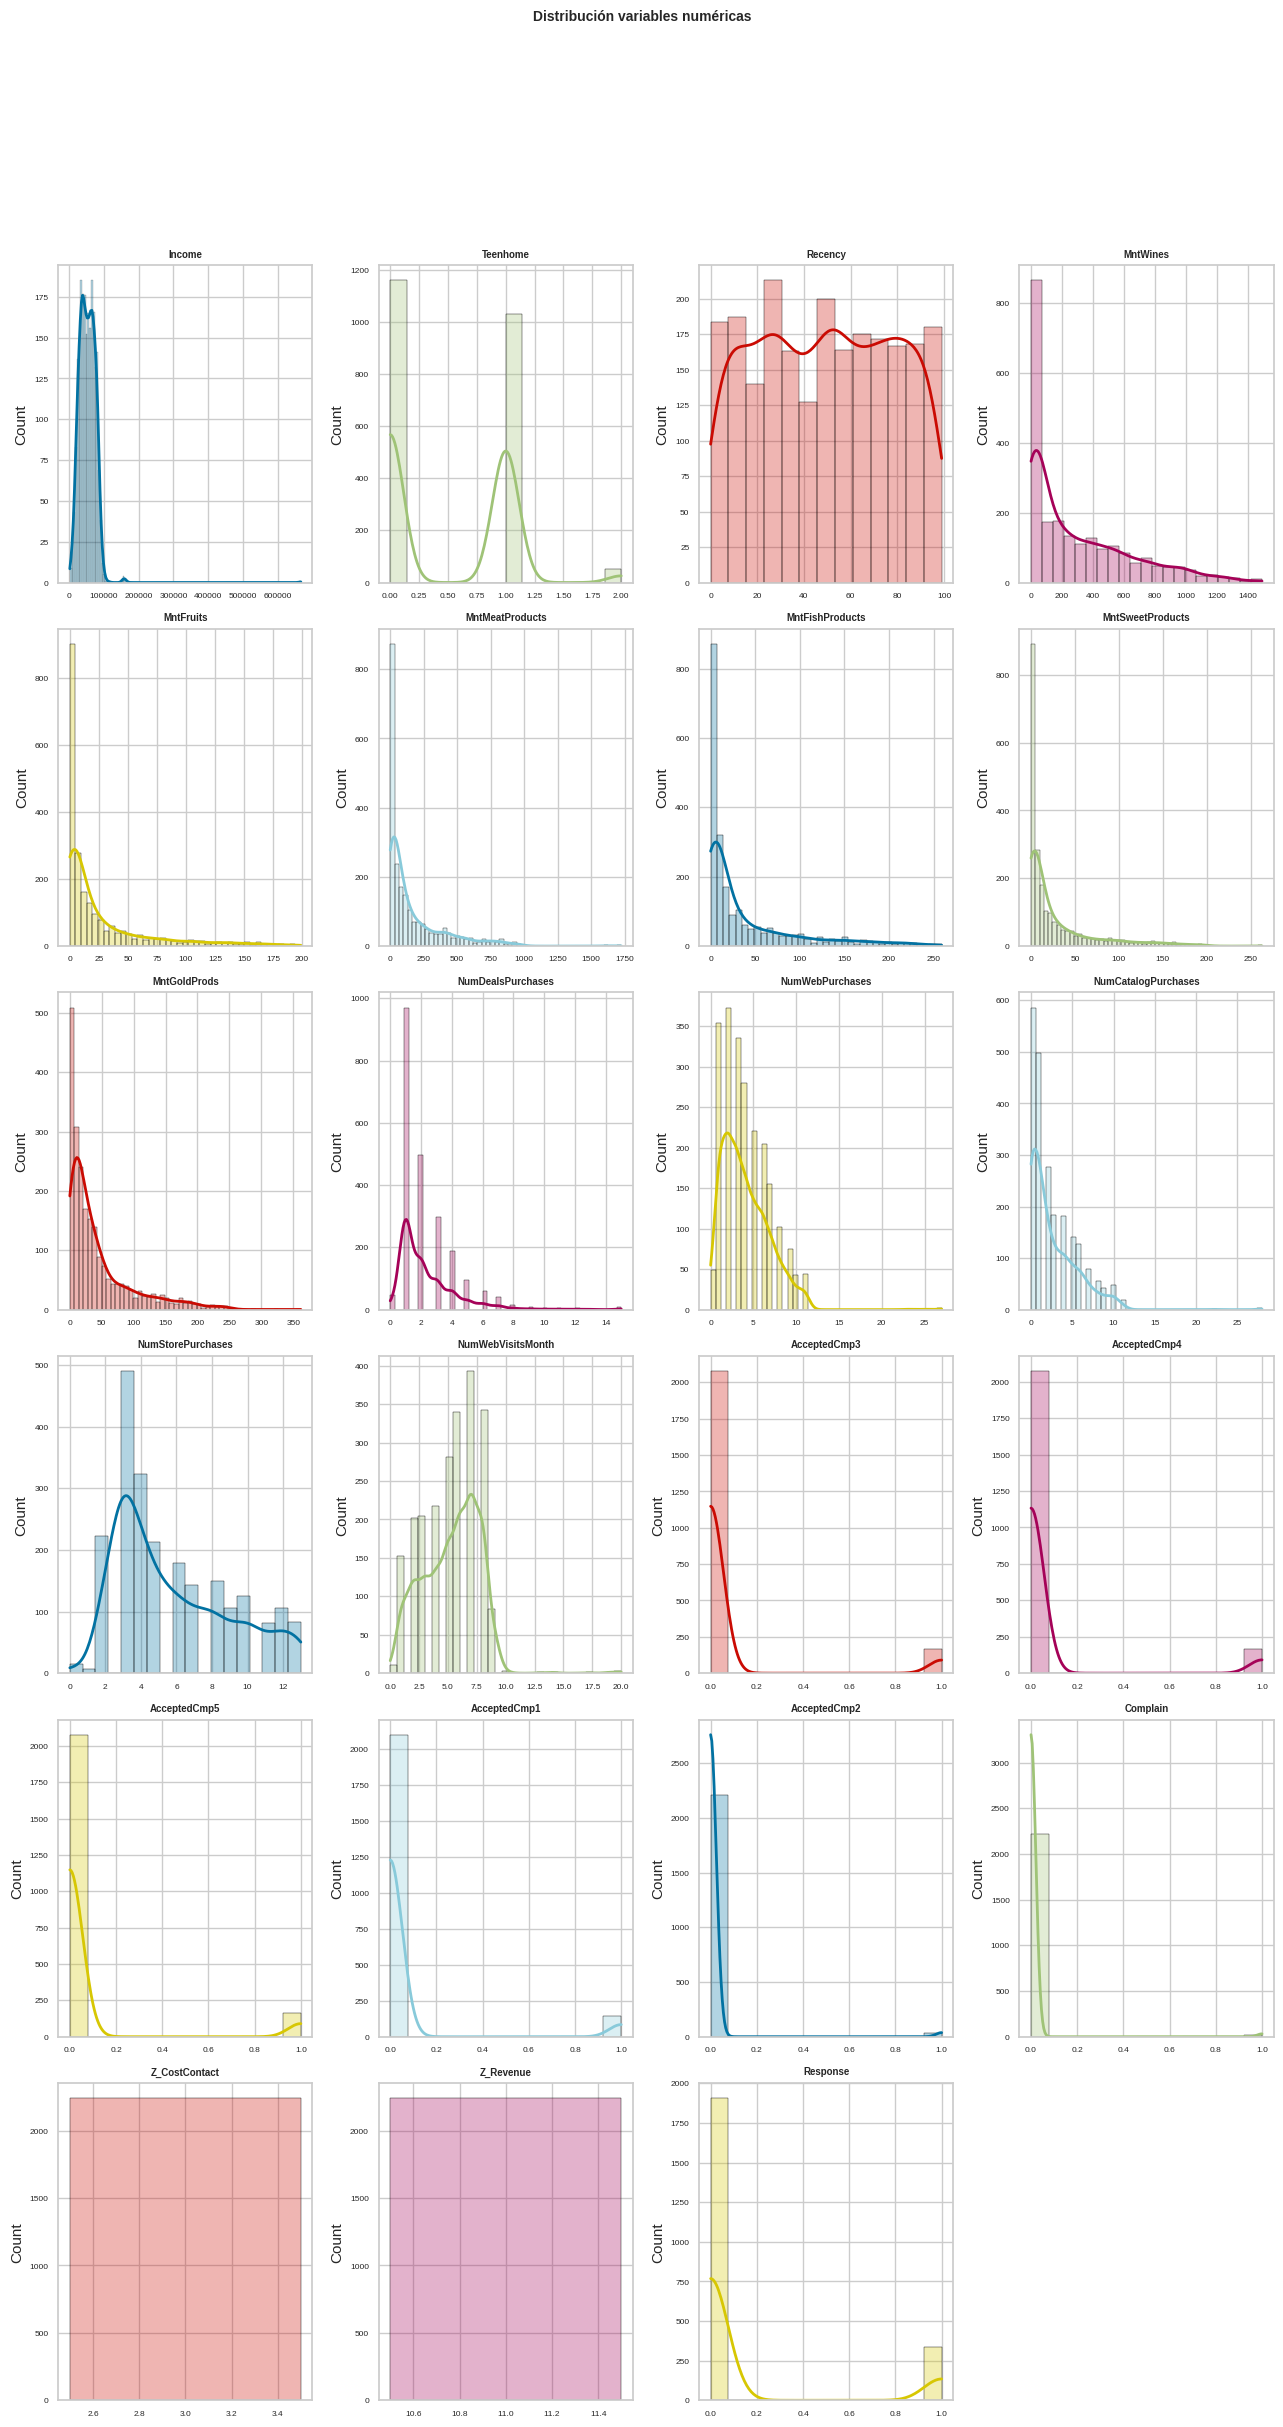

In [54]:
import math

# Variables numéricas
# ==============================================================================
# Drop 'ID' and 'Year_Birth' from the list of numeric columns
columnas_numeric = data.select_dtypes(include=['float64', 'int']).columns.drop(['ID', 'Year_Birth'])

nColums_numeric = len(columnas_numeric)
nRows_numeric = math.ceil(nColums_numeric / 3)

# Adjust the figure size to accommodate all plots
fig, axes = plt.subplots(nrows=nRows_numeric, ncols=4, figsize=(13, nRows_numeric * 4))
axes = axes.flat

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = data,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i % len(plt.rcParams['axes.prop_cycle'])]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Remove any unused subplots if the total number of subplots is greater than the number of columns
#for j in range(i + 1, nRows_numeric * 3):
    #fig.delaxes(axes[j])

# Oculta ejes sobrantes si hay más subgráficos que columnas
for ax in axes[len(columnas_numeric):]:
    ax.set_visible(False)

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

La variable **Z_CostContact** y **Z_Revenue** presentan una distribución uniforme y podemos deducir que son variables redundantes. Existen variables que presentan una distribución discreta que deberemos valorar transformarlas en variables de tipo :cualitativa.

Las variables **KidHome** y **TeenHome** aunque es de tipo numérico, apenas toma unos pocos valores y la gran mayoría de observaciones pertenecen a solo dos de ellos. En casos como este, suele ser conveniente tratar la variable como cualitativa.

In [51]:
# Valores observados del número de niños pequeños en el hogar del cliente.
# ==============================================================================
data.Kidhome.value_counts()


,count
Kidhome,
0,1293
1,899
2,48


In [ ]:
# Se convierte la variable KidHome tipo string
# ==============================================================================
data.Kidhome = data.Kidhome.astype("str")

In [52]:
# Valores observados del número de adolescentes en el hogar del cliente.
# ==============================================================================
data.Teenhome.value_counts()

,count
Teenhome,
0,1158
1,1030
2,52


In [53]:
# Se convierte la variable KidHome tipo string
# ==============================================================================
data.Kidhome = data.Teenhome.astype("str")

Las dos variables tomaran solo dos variables:

* KidHome: 0 sin niños y 1 con niños.
* TeenHome: 0 sin adolescentes, 1 con adolescentes.

Uniremos los valores del 1 y 2 ya que no aportan valor por separado.

###